(5000, 784)


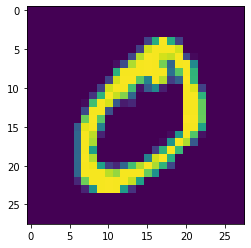

In [ ]:
import numpy as np
from mlxtend.classifier import Perceptron
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import mlxtend.data as mlxData
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
#X contiene un conjunto de 5000 imagenes 
#Y contiene las etiquetas 
X, Y = mlxData.mnist_data()
img = X[0]
print(X.shape)
img = img.reshape(28,28)
plt.imshow(img)

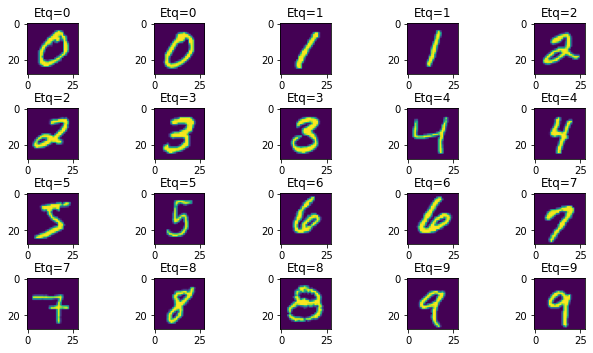

In [ ]:
plt.rcParams["figure.figsize"] = (10,6) 
plt.subplots_adjust(wspace = 1.5)
for i in np.arange(0,20):
  indx = i*250
  img = X[ indx ].reshape(28 ,28)
  plt.subplot( 4 , 5 , i +1) 
  plt.title("Etq="+ str(Y[indx])) 
  plt.imshow(img)

In [ ]:

#3.4.5. Ejercicios sobre el conjunto de datos MNIST 

#1. Tome únicamente elementos de dos tipos de dígitos, por ejemplo de los dígitos 0 y 1.
# Utilice el algoritmo del perceptrón para probar la clasificación. Considere los siguientes puntos.
#Deje variables que permitan cambiar los dígitos que se deberán procesar, de tal forma que a futuro pueda
 #seleccionar para sus pruebas dígitos diferentes. Por ejemplo el 4 y el 9, que posiblemente presenten problemas de clasificaci ́on.
digito1 = 6
digito2 = 8
if digito1>digito2:
  digito1, digito2 = digito2, digito1

XX = X[digito1*500:(digito1*500)+500]
XX = np.append( XX, X[digito2*500:(digito2*500)+500], axis=0)

Yn = np.full(500, 0)
Yn = np.append(Yn, np.full(500, 1))





In [ ]:
#Calcule máximos y mínimos de los valores en el conjunto de datos para verificar si requiere
# normalizar los datos.
Max = np.zeros(1000)
Min = np.zeros(1000)
for i in np.arange(1000):
  Min[i] = np.amin(XX[i])
  Max[i]= np.amax(XX[i])

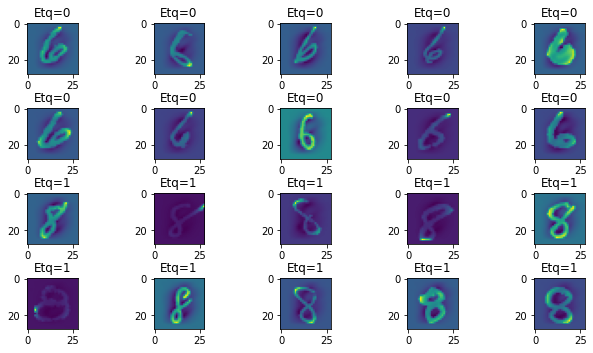

In [ ]:
#Si requiere normalizar los datos ocupe StandardScaler o MinMaxScaler antes de meterlos al 
#algoritmo.
sc = StandardScaler()
sc.fit(XX)
Xn = sc.transform(XX)
plt.rcParams["figure.figsize"] = (10, 6)
plt.subplots_adjust(wspace=1.5)
for i in np.arange(0, 20):
  indx = i*50
  img = Xn[indx].reshape(28, 28)
  plt.subplot(4, 5, i+1)
  plt.title("Etq="+str(Yn[indx]))
  plt.imshow(img)

In [ ]:
#Utilice la clase del perceptr ́on de MLxtend o el algoritmo del Perceptr ́on de Rosenblatt 
#programado, en cada caso, tenga en cuenta los valores que deben tener las etiquetas.
per3 = Perceptron(eta=0.05, epochs=100, random_seed=1, print_progress=3)
per3.fit(Xn, Yn)

/usr/local/lib/python3.6/dist-packages/mlxtend/_base/_classifier.py:19: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if not np.issubdtype(y[0], int):
Iteration: 100/100 | Elapsed: 0:00:03 | ETA: 0:00:00

In [ ]:
#Calcule la precisión de clasificación.
print("\n------precision------")
print(per3.score(Xn, Yn))


------precision------
1.0


In [ ]:
def signo2(x):
  return  (x>=0)*2-1

X, Y = mlxData.mnist_data()
sc = StandardScaler()
sc.fit(X)
Xn = sc.transform(X)

In [ ]:
#2.Ocupe el algoritmo del perceptron de Rosenblatt para generar 10 perceptrones, uno por cada
#dígito. La idea de cada perceptron es que sea entrenado como uno contra el resto, es decir:

# a) 0 vs los demás (que no son 0). 
# b) 1 vs los demás.
# c) Etc.
#se debe entrenar con respuesta 1 si es del d ́ıgito seleccionado, y -1 si no corresponde
# con el dígito seleccionado.
#Calcule por separado la respuesta de clasificaci ́on de cada uno de los 10 perceptrones.
for N in np.arange(10):
  resto = np.zeros(9)
  perceptron_number=0
  numero = N
  cont=0
  for i in np.arange(10):
    if(i!=numero):
      resto[cont] = i
      cont = cont +1

  print("\nEl número que se va a evaluar es ", N)

  numero = N
  if numero>resto[perceptron_number]:
    numero, resto[perceptron_number] = resto[perceptron_number], numero
  numero2 = resto[perceptron_number]

  XX = Xn[int(numero)*500:(int(numero)*500)+500]
  XX = np.append( XX, Xn[int(numero2)*500:(int(numero2)*500)+500], axis=0)

  unos = np.ones( (1000, 1))
  Xnn = np.concatenate( (unos, XX[:1000]), axis = 1 )
  Ynn = np.arange(1000)
  Ynn = (Ynn>=500)*2-1

  W = np.random.uniform(low=-0.2, high=0.2, size=785)

  aprende = 0.4
  for i in range(1000):
    j = np.random.randint(0, 1000, 1)
    v = Xnn[j, :].dot(W.T)
    y = signo2(v)
    W = W +  aprende * ( Ynn[j] - y  ) * Xnn[j, :]
  Acc = ((signo2( Xnn.dot(W.T).reshape (1000  ) ) == Ynn)*1.0).mean()
  print(numero, "vs ", numero2, "con eficiencia del : ", Acc)


  perceptron_number = perceptron_number +1


  numero = N
  if numero>resto[perceptron_number]:
    numero, resto[perceptron_number] = resto[perceptron_number], numero
  numero2 = resto[perceptron_number]

  XX = Xn[int(numero)*500:(int(numero)*500)+500]
  XX = np.append( XX, Xn[int(numero2)*500:(int(numero2)*500)+500], axis=0)

  unos = np.ones( (1000, 1))
  Xnn = np.concatenate( (unos, XX[:1000]), axis = 1 )
  Ynn = np.arange(1000)
  Ynn = (Ynn>=500)*2-1

  W = np.random.uniform(low=-0.2, high=0.2, size=785)

  aprende = 0.4
  for i in range(1000):
    j = np.random.randint(0, 1000, 1)
    v = Xnn[j, :].dot(W.T)
    y = signo2(v)
    W = W +  aprende * ( Ynn[j] - y  ) * Xnn[j, :]
  Acc = ((signo2( Xnn.dot(W.T).reshape (1000  ) ) == Ynn)*1.0).mean()
  print(numero, "vs ", numero2, "con eficiencia del : ", Acc)


  perceptron_number = perceptron_number +1


  numero = N
  if numero>resto[perceptron_number]:
    numero, resto[perceptron_number] = resto[perceptron_number], numero
  numero2 = resto[perceptron_number]

  XX = Xn[int(numero)*500:(int(numero)*500)+500]
  XX = np.append( XX, Xn[int(numero2)*500:(int(numero2)*500)+500], axis=0)

  unos = np.ones( (1000, 1))
  Xnn = np.concatenate( (unos, XX[:1000]), axis = 1 )
  Ynn = np.arange(1000)
  Ynn = (Ynn>=500)*2-1

  W = np.random.uniform(low=-0.2, high=0.2, size=785)

  aprende = 0.4
  for i in range(1000):
    j = np.random.randint(0, 1000, 1)
    v = Xnn[j, :].dot(W.T)
    y = signo2(v)
    W = W +  aprende * ( Ynn[j] - y  ) * Xnn[j, :]
  Acc = ((signo2( Xnn.dot(W.T).reshape (1000  ) ) == Ynn)*1.0).mean()
  print(numero, "vs ", numero2, "con eficiencia del : ", Acc)

  perceptron_number = perceptron_number +1


  numero = N
  if numero>resto[perceptron_number]:
    numero, resto[perceptron_number] = resto[perceptron_number], numero
  numero2 = resto[perceptron_number]

  XX = Xn[int(numero)*500:(int(numero)*500)+500]
  XX = np.append( XX, Xn[int(numero2)*500:(int(numero2)*500)+500], axis=0)

  unos = np.ones( (1000, 1))
  Xnn = np.concatenate( (unos, XX[:1000]), axis = 1 )
  Ynn = np.arange(1000)
  Ynn = (Ynn>=500)*2-1

  W = np.random.uniform(low=-0.2, high=0.2, size=785)

  aprende = 0.4
  for i in range(1000):
    j = np.random.randint(0, 1000, 1)
    v = Xnn[j, :].dot(W.T)
    y = signo2(v)
    W = W +  aprende * ( Ynn[j] - y  ) * Xnn[j, :]
  Acc = ((signo2( Xnn.dot(W.T).reshape (1000  ) ) == Ynn)*1.0).mean()
  print(numero, "vs ", numero2, "con eficiencia del : ", Acc)

  perceptron_number = perceptron_number +1


  numero = N
  if numero>resto[perceptron_number]:
    numero, resto[perceptron_number] = resto[perceptron_number], numero
  numero2 = resto[perceptron_number]

  XX = Xn[int(numero)*500:(int(numero)*500)+500]
  XX = np.append( XX, Xn[int(numero2)*500:(int(numero2)*500)+500], axis=0)

  unos = np.ones( (1000, 1))
  Xnn = np.concatenate( (unos, XX[:1000]), axis = 1 )
  Ynn = np.arange(1000)
  Ynn = (Ynn>=500)*2-1

  W = np.random.uniform(low=-0.2, high=0.2, size=785)

  aprende = 0.4
  for i in range(1000):
    j = np.random.randint(0, 1000, 1)
    v = Xnn[j, :].dot(W.T)
    y = signo2(v)
    W = W +  aprende * ( Ynn[j] - y  ) * Xnn[j, :]
  Acc = ((signo2( Xnn.dot(W.T).reshape (1000  ) ) == Ynn)*1.0).mean()
  print(numero, "vs ", numero2, "con eficiencia del : ", Acc)

  perceptron_number = perceptron_number +1


  numero = N
  if numero>resto[perceptron_number]:
    numero, resto[perceptron_number] = resto[perceptron_number], numero
  numero2 = resto[perceptron_number]

  XX = Xn[int(numero)*500:(int(numero)*500)+500]
  XX = np.append( XX, Xn[int(numero2)*500:(int(numero2)*500)+500], axis=0)

  unos = np.ones( (1000, 1))
  Xnn = np.concatenate( (unos, XX[:1000]), axis = 1 )
  Ynn = np.arange(1000)
  Ynn = (Ynn>=500)*2-1
  W = np.random.uniform(low=-0.2, high=0.2, size=785)

  aprende = 0.4
  for i in range(1000):
    j = np.random.randint(0, 1000, 1)
    v = Xnn[j, :].dot(W.T)
    y = signo2(v)
    W = W +  aprende * ( Ynn[j] - y  ) * Xnn[j, :]
  Acc = ((signo2( Xnn.dot(W.T).reshape (1000  ) ) == Ynn)*1.0).mean()
  print(numero, "vs ", numero2, "con eficiencia del : ", Acc)

  perceptron_number = perceptron_number +1



  numero = N
  if numero>resto[perceptron_number]:
    numero, resto[perceptron_number] = resto[perceptron_number], numero
  numero2 = resto[perceptron_number]

  XX = Xn[int(numero)*500:(int(numero)*500)+500]
  XX = np.append( XX, Xn[int(numero2)*500:(int(numero2)*500)+500], axis=0)

  unos = np.ones( (1000, 1))
  Xnn = np.concatenate( (unos, XX[:1000]), axis = 1 )
  Ynn = np.arange(1000)
  Ynn = (Ynn>=500)*2-1

  W = np.random.uniform(low=-0.2, high=0.2, size=785)

  aprende = 0.4
  for i in range(1000):
    j = np.random.randint(0, 1000, 1)
    v = Xnn[j, :].dot(W.T)
    y = signo2(v)
    W = W +  aprende * ( Ynn[j] - y  ) * Xnn[j, :]
  Acc = ((signo2( Xnn.dot(W.T).reshape (1000  ) ) == Ynn)*1.0).mean()
  print(numero, "vs ", numero2, "con eficiencia del : ", Acc)

  perceptron_number = perceptron_number +1


  numero = N
  if numero>resto[perceptron_number]:
    numero, resto[perceptron_number] = resto[perceptron_number], numero
  numero2 = resto[perceptron_number]

  XX = Xn[int(numero)*500:(int(numero)*500)+500]
  XX = np.append( XX, Xn[int(numero2)*500:(int(numero2)*500)+500], axis=0)

  unos = np.ones( (1000, 1))
  Xnn = np.concatenate( (unos, XX[:1000]), axis = 1 )
  Ynn = np.arange(1000)
  Ynn = (Ynn>=500)*2-1

  W = np.random.uniform(low=-0.2, high=0.2, size=785)

  aprende = 0.4
  for i in range(1000):
    j = np.random.randint(0, 1000, 1)
    v = Xnn[j, :].dot(W.T)
    y = signo2(v)
    W = W +  aprende * ( Ynn[j] - y  ) * Xnn[j, :]
  Acc = ((signo2( Xnn.dot(W.T).reshape (1000  ) ) == Ynn)*1.0).mean()
  print(numero, "vs ", numero2, "con eficiencia del : ", Acc)

  perceptron_number = perceptron_number +1


  numero = N
  if numero>resto[perceptron_number]:
    numero, resto[perceptron_number] = resto[perceptron_number], numero
  numero2 = resto[perceptron_number]

  XX = Xn[int(numero)*500:(int(numero)*500)+500]
  XX = np.append( XX, Xn[int(numero2)*500:(int(numero2)*500)+500], axis=0)

  unos = np.ones( (1000, 1))
  Xnn = np.concatenate( (unos, XX[:1000]), axis = 1 )
  Ynn = np.arange(1000)
  Ynn = (Ynn>=500)*2-1

  W = np.random.uniform(low=-0.2, high=0.2, size=785)

  aprende = 0.4
  for i in range(1000):
    j = np.random.randint(0, 1000, 1)
    v = Xnn[j, :].dot(W.T)
    y = signo2(v)
    W = W +  aprende * ( Ynn[j] - y  ) * Xnn[j, :]

  Acc = ((signo2( Xnn.dot(W.T).reshape (1000  ) ) == Ynn)*1.0).mean()
  print(numero, "vs ", numero2, "con eficiencia del : ", Acc)


El número que se va a evaluar es  0
0 vs  1.0 con eficiencia del :  0.999
0 vs  2.0 con eficiencia del :  0.975
0 vs  3.0 con eficiencia del :  0.983
0 vs  4.0 con eficiencia del :  0.996
0 vs  5.0 con eficiencia del :  0.983
0 vs  6.0 con eficiencia del :  0.992
0 vs  7.0 con eficiencia del :  0.994
0 vs  8.0 con eficiencia del :  0.993
0 vs  9.0 con eficiencia del :  0.987

El número que se va a evaluar es  1
0.0 vs  1.0 con eficiencia del :  1.0
1 vs  2.0 con eficiencia del :  0.974
1 vs  3.0 con eficiencia del :  0.98
1 vs  4.0 con eficiencia del :  0.989
1 vs  5.0 con eficiencia del :  0.989
1 vs  6.0 con eficiencia del :  0.989
1 vs  7.0 con eficiencia del :  0.986
1 vs  8.0 con eficiencia del :  0.953
1 vs  9.0 con eficiencia del :  0.991

El número que se va a evaluar es  2
0.0 vs  2.0 con eficiencia del :  0.98
1.0 vs  2.0 con eficiencia del :  0.964
2 vs  3.0 con eficiencia del :  0.968
2 vs  4.0 con eficiencia del :  0.959
2 vs  5.0 con eficiencia del :  0.978
2 vs  6.0 con

In [ ]:
X, Y = mlxData.mnist_data()
sc = StandardScaler()
sc.fit(X)
Xn = sc.transform(X)

In [ ]:
# A partir del punto anterior, tomando los 10 perceptrones, considere alguna forma que permita 
# calcular la etiqueta de la imagen de algún dígito introducido. Para esto ocupe el conjunto 
# MNIST separando de forma aleatoria el 70% de los datos para entrenamiento y genere la precisión
# de clasificación con el resto.
#Para resolver este problema observe las salidas de los datos cuando son de cierto tipo de
# etiqueta contra los casos en que no son de dicho tipo.

resto = np.zeros(9)
perceptron_number=0
numero = N
cont=0
for i in np.arange(10):
  if(i!=numero):
    resto[cont] = i
    cont = cont +1

print("\nEl número a evaluar es ", N)
numero = N
if numero>resto[perceptron_number]:
  numero, resto[perceptron_number] = resto[perceptron_number], numero
numero2 = resto[perceptron_number]

Ynn = np.arange(1000)
Ynn = (Ynn>=500)*2-1
XX = Xn[int(numero)*500:(int(numero)*500)+500]
XX = np.append( XX, Xn[int(numero2)*500:(int(numero2)*500)+500], axis=0)
unos = np.ones( (1000, 1))
Xnn = np.concatenate( (unos, XX[:1000]), axis = 1 )

X_train, X_test, Y_train, Y_test = train_test_split(Xnn, Ynn, test_size=0.3)
W = np.random.uniform(low=-0.2, high=0.2, size=785)
aprende = 0.4
for i in range(500):
  j = np.random.randint(0, 700, 1)
  v = Xnn[j, :].dot(W.T)
  y = signo2(v)
  W = W +  aprende * ( Y_train[j] - y  ) * X_train[j, :]

Acc = ((signo2( X_test.dot(W.T).reshape (300  ) ) == Y_test)*1.0).mean()
print(numero, "vs ", numero2, "con eficiencia del = ", Acc)
perceptron_number = perceptron_number +1


numero = N
if numero>resto[perceptron_number]:
  numero, resto[perceptron_number] = resto[perceptron_number], numero
numero2 = resto[perceptron_number]

Ynn = np.arange(1000)
Ynn = (Ynn>=500)*2-1
XX = Xn[int(numero)*500:(int(numero)*500)+500]
XX = np.append( XX, Xn[int(numero2)*500:(int(numero2)*500)+500], axis=0)
unos = np.ones( (1000, 1))
Xnn = np.concatenate( (unos, XX[:1000]), axis = 1 )


X_train, X_test, Y_train, Y_test = train_test_split(Xnn, Ynn, test_size=0.3)

W = np.random.uniform(low=-0.2, high=0.2, size=785)
aprende = 0.4
for i in range(500):
  j = np.random.randint(0, 700, 1)
  v = Xnn[j, :].dot(W.T)
  y = signo2(v)
  W = W +  aprende * ( Y_train[j] - y  ) * X_train[j, :]
Acc = ((signo2( X_test.dot(W.T).reshape (300  ) ) == Y_test)*1.0).mean()
print(numero, "vs ", numero2, "con eficiencia del = ", Acc)

perceptron_number = perceptron_number +1


numero = N
if numero>resto[perceptron_number]:
  numero, resto[perceptron_number] = resto[perceptron_number], numero
numero2 = resto[perceptron_number]


Ynn = np.arange(1000)
Ynn = (Ynn>=500)*2-1
XX = Xn[int(numero)*500:(int(numero)*500)+500]
XX = np.append( XX, Xn[int(numero2)*500:(int(numero2)*500)+500], axis=0)
unos = np.ones( (1000, 1))
Xnn = np.concatenate( (unos, XX[:1000]), axis = 1 )


X_train, X_test, Y_train, Y_test = train_test_split(Xnn, Ynn, test_size=0.3)

W = np.random.uniform(low=-0.2, high=0.2, size=785)
aprende = 0.4
for i in range(500):
  j = np.random.randint(0, 700, 1)
  v = Xnn[j, :].dot(W.T)
  y = signo2(v)
  W = W +  aprende * ( Y_train[j] - y  ) * X_train[j, :]

Acc = ((signo2( X_test.dot(W.T).reshape (300  ) ) == Y_test)*1.0).mean()
print(numero, "vs ", numero2, "con eficiencia del = ", Acc)

perceptron_number = perceptron_number +1


numero = N
if numero>resto[perceptron_number]:
  numero, resto[perceptron_number] = resto[perceptron_number], numero
numero2 = resto[perceptron_number]


Ynn = np.arange(1000)
Ynn = (Ynn>=500)*2-1
XX = Xn[int(numero)*500:(int(numero)*500)+500]
XX = np.append( XX, Xn[int(numero2)*500:(int(numero2)*500)+500], axis=0)
unos = np.ones( (1000, 1))
Xnn = np.concatenate( (unos, XX[:1000]), axis = 1 )


X_train, X_test, Y_train, Y_test = train_test_split(Xnn, Ynn, test_size=0.3)

W = np.random.uniform(low=-0.2, high=0.2, size=785)
aprende = 0.4
for i in range(500):
  j = np.random.randint(0, 700, 1)
  v = Xnn[j, :].dot(W.T)
  y = signo2(v)
  W = W +  aprende * ( Y_train[j] - y  ) * X_train[j, :]

Acc = ((signo2( X_test.dot(W.T).reshape (300  ) ) == Y_test)*1.0).mean()
print(numero, "vs ", numero2, "con eficiencia del = ", Acc)


perceptron_number = perceptron_number +1


numero = N
if numero>resto[perceptron_number]:
  numero, resto[perceptron_number] = resto[perceptron_number], numero
numero2 = resto[perceptron_number]

Ynn = np.arange(1000)
Ynn = (Ynn>=500)*2-1
XX = Xn[int(numero)*500:(int(numero)*500)+500]
XX = np.append( XX, Xn[int(numero2)*500:(int(numero2)*500)+500], axis=0)
unos = np.ones( (1000, 1))
Xnn = np.concatenate( (unos, XX[:1000]), axis = 1 )


X_train, X_test, Y_train, Y_test = train_test_split(Xnn, Ynn, test_size=0.3)

W = np.random.uniform(low=-0.2, high=0.2, size=785)
aprende = 0.4
for i in range(500):
  j = np.random.randint(0, 700, 1)
  v = Xnn[j, :].dot(W.T)
  y = signo2(v)
  W = W +  aprende * ( Y_train[j] - y  ) * X_train[j, :]

Acc = ((signo2( X_test.dot(W.T).reshape (300  ) ) == Y_test)*1.0).mean()
print(numero, "vs ", numero2, "con eficiencia del = ", Acc)

perceptron_number = perceptron_number +1

numero = N
if numero>resto[perceptron_number]:
  numero, resto[perceptron_number] = resto[perceptron_number], numero
numero2 = resto[perceptron_number]


Ynn = np.arange(1000)
Ynn = (Ynn>=500)*2-1
XX = Xn[int(numero)*500:(int(numero)*500)+500]
XX = np.append( XX, Xn[int(numero2)*500:(int(numero2)*500)+500], axis=0)
unos = np.ones( (1000, 1))
Xnn = np.concatenate( (unos, XX[:1000]), axis = 1 )



X_train, X_test, Y_train, Y_test = train_test_split(Xnn, Ynn, test_size=0.3)

W = np.random.uniform(low=-0.2, high=0.2, size=785)
aprende = 0.4
for i in range(500):
  j = np.random.randint(0, 700, 1)
  v = Xnn[j, :].dot(W.T)
  y = signo2(v)
  W = W +  aprende * ( Y_train[j] - y  ) * X_train[j, :]

Acc = ((signo2( X_test.dot(W.T).reshape (300  ) ) == Y_test)*1.0).mean()
print(numero, "vs ", numero2, "con eficiencia del = ", Acc)

perceptron_number = perceptron_number +1

numero = N
if numero>resto[perceptron_number]:
  numero, resto[perceptron_number] = resto[perceptron_number], numero
numero2 = resto[perceptron_number]

Ynn = np.arange(1000)
Ynn = (Ynn>=500)*2-1
XX = Xn[int(numero)*500:(int(numero)*500)+500]
XX = np.append( XX, Xn[int(numero2)*500:(int(numero2)*500)+500], axis=0)
unos = np.ones( (1000, 1))
Xnn = np.concatenate( (unos, XX[:1000]), axis = 1 )



X_train, X_test, Y_train, Y_test = train_test_split(Xnn, Ynn, test_size=0.3)

W = np.random.uniform(low=-0.2, high=0.2, size=785)
aprende = 0.4
for i in range(500):
  j = np.random.randint(0, 700, 1)
  v = Xnn[j, :].dot(W.T)
  y = signo2(v)
  W = W +  aprende * ( Y_train[j] - y  ) * X_train[j, :]

Acc = ((signo2( X_test.dot(W.T).reshape (300  ) ) == Y_test)*1.0).mean()
print(numero, "vs ", numero2, "con eficiencia del = ", Acc)

perceptron_number = perceptron_number +1


numero = N
if numero>resto[perceptron_number]:
  numero, resto[perceptron_number] = resto[perceptron_number], numero
numero2 = resto[perceptron_number]


Ynn = np.arange(1000)
Ynn = (Ynn>=500)*2-1
XX = Xn[int(numero)*500:(int(numero)*500)+500]
XX = np.append( XX, Xn[int(numero2)*500:(int(numero2)*500)+500], axis=0)
unos = np.ones( (1000, 1))
Xnn = np.concatenate( (unos, XX[:1000]), axis = 1 )



X_train, X_test, Y_train, Y_test = train_test_split(Xnn, Ynn, test_size=0.3)

W = np.random.uniform(low=-0.2, high=0.2, size=785)
aprende = 0.4
for i in range(500):
  j = np.random.randint(0, 700, 1)
  v = Xnn[j, :].dot(W.T)
  y = signo2(v)
  W = W +  aprende * ( Y_train[j] - y  ) * X_train[j, :]

Acc = ((signo2( X_test.dot(W.T).reshape (300  ) ) == Y_test)*1.0).mean()
print(numero, "vs ", numero2, "con eficiencia del = ", Acc)

perceptron_number = perceptron_number +1


numero = N
if numero>resto[perceptron_number]:
  numero, resto[perceptron_number] = resto[perceptron_number], numero
numero2 = resto[perceptron_number]


Ynn = np.arange(1000)
Ynn = (Ynn>=500)*2-1
XX = Xn[int(numero)*500:(int(numero)*500)+500]
XX = np.append( XX, Xn[int(numero2)*500:(int(numero2)*500)+500], axis=0)
unos = np.ones( (1000, 1))
Xnn = np.concatenate( (unos, XX[:1000]), axis = 1 )


X_train, X_test, Y_train, Y_test = train_test_split(Xnn, Ynn, test_size=0.3)

W = np.random.uniform(low=-0.2, high=0.2, size=785)
aprende = 0.4
for i in range(500):
  j = np.random.randint(0, 700, 1)
  v = Xnn[j, :].dot(W.T)
  y = signo2(v)
  W = W +  aprende * ( Y_train[j] - y  ) * X_train[j, :]

Acc = ((signo2( X_test.dot(W.T).reshape (300  ) ) == Y_test)*1.0).mean()
print(numero, "vs ", numero2, "con eficiencia del = ", Acc)


El número a evaluar es  9
0.0 vs  9.0 con eficiencia del =  0.98
1.0 vs  9.0 con eficiencia del =  0.99
2.0 vs  9.0 con eficiencia del =  0.9766666666666667
3.0 vs  9.0 con eficiencia del =  0.9433333333333334
4.0 vs  9.0 con eficiencia del =  0.8533333333333334
5.0 vs  9.0 con eficiencia del =  0.9
6.0 vs  9.0 con eficiencia del =  0.9933333333333333
7.0 vs  9.0 con eficiencia del =  0.82
8.0 vs  9.0 con eficiencia del =  0.9333333333333333
